In [1]:
class TabuList(object):
    
    def __init__(self, length):
        self.data = []
        self.length = length
        
    def append(self, x):
        self.data.append(list(x))
        
        if len(self.data) > self.length:
            del self.data[0]
            
    def has(self, x):
        return x in self.data
    
    def __str__(self):
        return "%s" % self.data

In [2]:
import random
import itertools
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

class HybridSearchTSP:
    @classmethod
    def __init__(self, graph, CN, temperature, cooling_rate, t_end, Elen, TL, initial_tour=None):
        self.graph = graph
        self.n = len(graph)
        self.CN = CN
        self.temperature = temperature
        self.cooling_rate = cooling_rate
        self.t_end = t_end
        self.Elen = Elen
        self.TL = TL
        self.initial_tour = initial_tour

    
    @classmethod
    def _generate_tour(self):
        random.seed(11)
        tour = [_ for _ in range(self.n)]
        random.shuffle(tour)
        return tour
                
    @classmethod
    def get_best_neighbor(self, tour):
        combination = list(range(0, N))
        i = 0
        delta_list = []
        neighbor_list = []
        while i < self.CN:
            pair = random.sample(combination, 2)
            neighbor = list(tour)
            a = pair[0];ind_a = neighbor.index(a)
            b = pair[1];ind_b = neighbor.index(b)
            delta = self.cost_change(self.graph, neighbor[ind_a-1], a, neighbor[ind_b-1], b )
            if ind_a < ind_b:
                neighbor[ind_a:ind_b] = reversed(neighbor[ind_a:ind_b])
            else:
                neighbor[ind_b:ind_a] = reversed(neighbor[ind_b:ind_a])
            if delta == 0:
                continue
            else:
                delta_list.append(delta)
                neighbor_list.append(neighbor)
                i += 1
        return delta_list, neighbor_list
        
    @classmethod
    def evaluate_solution(self, tour):
        distance = 0
        for i in range(len(tour)-1):
            a = tour[i]
            b = tour[i+1]
            d = self.graph[a][b]
            distance += d
        last = tour[-1]
        origin = tour[0]
        distance += self.graph[last][origin]
        return distance
    
    @classmethod
    def cost_change(self, cost_mat, n1, n2, n3, n4):
        return cost_mat[n1][n3] + cost_mat[n2][n4] - cost_mat[n1][n2] - cost_mat[n3][n4]
                
    @classmethod
    def run(self):
        E_best_list = []
        if self.initial_tour:
            X_current = self.initial_tour
        else:
            X_current = self._generate_tour()
            E_current = self.evaluate_solution(X_current)
            X_best = X_current
            E_best = E_current
            
        print('initial solution:', E_current)
        tb = TabuList(TL)
        
        while self.temperature > self.t_end:
            print(self.temperature, E_best)
            iters = 0
            while iters < self.Elen:
                delta_list, neighbor_list = self.get_best_neighbor(X_current)
                #print(delta_list)
                min_index = np.argmin(delta_list)
                delta_opt = delta_list[min_index]
                X_opt = neighbor_list[min_index]
                
                if E_current + delta_opt < E_best :
                    X_current = X_opt
                    E_current = E_current + delta_opt
                    X_best = X_current
                    E_best = E_current
                    tb.append(X_opt)

        
                else:
                    while True:
                        X_opt = neighbor_list[min_index]
                        delta_opt = delta_list[min_index]

                        if not tb.has(X_opt):
                            break
                        else:
                            delta_list[min_index] = np.inf
                            min_index = np.argmin(delta_list)
                    
                    if delta_opt > 0:
                        p = (2.46 * N * (delta_opt)) / (self.temperature * beta * (3.7 + (gamma**1.1)))
                    else:
                        p = 1

                    if delta_opt < 0 or p < np.random.rand():
                        X_current = X_opt
                        E_current = E_current + delta_opt

                        # update tabu list
                        tb.append(X_opt)
                
                iters += 1

            self.temperature = self.temperature * t_cool
            E_best_list.append(E_best)                
        print('Tour:', X_best, 'Tour Length:', E_best )
        plt.plot(E_best_list)
        plt.show()

12380
0.4780385515497486
2321 250 29
Running Hybrid Search
initial solution: 166715
50 166715
49.5 24582
49.005 23691
48.51495 23691
48.0298005 23691
47.549502495 23691
47.07400747005 23691
46.6032673953495 23691
46.137234721396005 23691
45.675862374182046 23691
45.219103750440226 23591
44.76691271293582 23591
44.31924358580646 23591
43.876051149948395 23591
43.437290638448914 23591
43.002917732064425 23387
42.57288855474378 23387
42.14715966919634 23387
41.725688072504376 23387
41.308431191779334 23387
40.89534687986154 23387
40.48639341106293 23387
40.0815294769523 23387
39.680714182182776 23387
39.283907040360944 23387
38.891067969957334 23387
38.50215729025776 23387
38.11713571735518 23387
37.73596436018163 23387
37.35860471657982 23387
36.98501866941402 23387
36.61516848271988 23387
36.24901679789268 23387
35.88652662991375 23387
35.52766136361461 23387
35.17238474997846 23387
34.82066090247868 23387
34.47245429345389 23387
34.12772975051936 23387
33.786452453014164 23387
33.44858

1.724885194758199 21679
1.707636342810617 21679
1.6905599793825108 21679
1.6736543795886856 21679
1.6569178357927987 21679
1.6403486574348707 21679
1.623945170860522 21679
1.6077057191519166 21642
1.5916286619603974 21642
1.5757123753407933 21636
1.5599552515873853 21581
1.5443556990715115 20890
1.5289121420807963 20890
1.5136230206599883 20890
1.4984867904533885 20890
1.4835019225488546 20890
1.4686669033233661 20890
1.4539802342901325 20890
1.4394404319472311 20890
1.4250460276277588 20890
1.4107955673514812 20890
1.3966876116779663 20890
1.3827207355611866 20890
1.3688935282055747 20890
1.355204592923519 20890
1.3416525469942837 20890
1.328236021524341 20890
1.3149536613090975 20890
1.3018041246960066 20890
1.2887860834490465 20890
1.275898222614556 20890
1.2631392403884105 20737
1.2505078479845264 20737
1.2380027695046811 20737
1.2256227418096344 20547
1.213366514391538 20547
1.2012328492476225 20547
1.1892205207551463 20547
1.1773283155475949 20547
1.1655550323921189 20547
1.15389

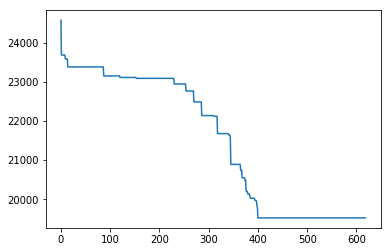

In [35]:
import random
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from random import sample
import itertools
%matplotlib inline 

'''
    - ATT48          33523
    - DANTZIG42        699
    - FRI26            937
    - FIVE              19
    - GR17            2085
    - P01              291
    - SGB128           
'''

full_path = "testdata.xlsx"
# Load a dataset
df = pd.read_excel(full_path, sheet_name="SGB128", header=None)
graph = df.values

# parameter setup
N = len(graph)
min_length = 0
min_length_sum = []
graph_copy = graph
for i in range(N):
    graph_copy_new = np.delete(graph_copy[i], i)
    #print(graph_copy_new)
    min_length = min(graph_copy_new)
    min_length_sum.append(min_length)
#print(min_length_sum)
beta = sum(min_length_sum); print(beta)
gamma = N*np.std(min_length_sum)/beta; print(gamma)

t_start = 50
t_cool = 0.99
t_end = 0.1
Elen = int((5600*(N**(0.4))*(1.27+gamma**(4.11))*(4.72*10**(-11)*(gamma+0.1)+N**(-2.81)))/((22.10+gamma**4.11)*(1.42*10**(-11)+N**(-2.81))))
CN = int((2800*(N**(1.1)))/Elen)
TL = int((Elen**0.6)/3.5)
print(Elen, CN, TL)

# tsp_plt = TSPPlotter()
# coords = tsp_plt.csv_2_tuple_list("./cluster0.csv")
# for i in range(5):
#   tsp_plt.plot_coords(coords,graph,heavy_nodes=[(0,i),(i,0)])

print("Running Hybrid Search")
HB = HybridSearchTSP(graph = graph, CN=CN, temperature=t_start, cooling_rate = t_cool, t_end = t_end, Elen =Elen, TL = TL).run()
